### Face Recognition using Labeled Faces in the Wild

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.conv_learner import *

In [3]:
BASE = 'data/lfiw/'

In [4]:
ls {BASE}

lfw-10/  lfw-5/             lfw-deepfunneled.tgz  README.txt
lfw-20/  lfw-deepfunneled/  lfw-names.txt.txt


In [5]:
PATH = 'data/lfiw/lfw-5/'

In [6]:
files = !ls {PATH}train/Serena_Williams 
files

['Serena_Williams_0001.jpg',
 'Serena_Williams_0002.jpg',
 'Serena_Williams_0003.jpg',
 'Serena_Williams_0004.jpg']

In [7]:
files = !ls {PATH}valid/Serena_Williams | head
files

['Serena_Williams_0005.jpg']

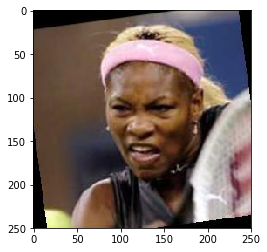

In [8]:
img = plt.imread(f'{PATH}valid/Serena_Williams/{files[0]}')
plt.imshow(img);

In [9]:
# Uncomment the below if you need to reset your precomputed activations
#!rm -rf {PATH}tmp

In [10]:
sz =224
#arch=resnet152
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.1, 10)

A Jupyter Widget

[ 0.       6.38646  5.52234  0.04527]                    
[ 1.       5.09504  5.08059  0.09198]                     
[ 2.       4.00661  4.91268  0.09438]                    
[ 3.       3.0004   4.94856  0.12483]                     
[ 4.       2.21618  5.17958  0.13662]                    
[ 5.       1.62871  5.35066  0.12546]                    
[ 6.       1.20821  5.4112   0.13805]                     
[ 7.       0.89985  5.65192  0.12912]                      
[ 8.       0.66569  5.76959  0.13582]                      
[ 9.       0.52404  5.81143  0.14475]                      



In [11]:
# This is the label for a val data
data.val_y

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,
        20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,
        60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99,
       100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119,
       120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159,
       160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179,
       180, 181, 182, 183, 184, 185, 

In [12]:
# from here we know that 'cats' is label 0 and 'dogs' is label 1.
data.classes

['Abdullah_Gul',
 'Adrien_Brody',
 'Ahmed_Chalabi',
 'Ai_Sugiyama',
 'Al_Gore',
 'Al_Sharpton',
 'Alan_Greenspan',
 'Alastair_Campbell',
 'Albert_Costa',
 'Alejandro_Toledo',
 'Ali_Naimi',
 'Allyson_Felix',
 'Alvaro_Uribe',
 'Amelia_Vega',
 'Amelie_Mauresmo',
 'Ana_Guevara',
 'Ana_Palacio',
 'Andre_Agassi',
 'Andy_Roddick',
 'Angela_Bassett',
 'Angela_Merkel',
 'Angelina_Jolie',
 'Ann_Veneman',
 'Anna_Kournikova',
 'Antonio_Banderas',
 'Antonio_Palocci',
 'Ari_Fleischer',
 'Ariel_Sharon',
 'Arminio_Fraga',
 'Arnold_Schwarzenegger',
 'Arnoldo_Aleman',
 'Ashanti',
 'Atal_Bihari_Vajpayee',
 'Ben_Affleck',
 'Benazir_Bhutto',
 'Benjamin_Netanyahu',
 'Bernard_Law',
 'Bertie_Ahern',
 'Bill_Clinton',
 'Bill_Frist',
 'Bill_Gates',
 'Bill_Graham',
 'Bill_McBride',
 'Bill_Simon',
 'Billy_Crystal',
 'Binyamin_Ben-Eliezer',
 'Bob_Graham',
 'Bob_Hope',
 'Bob_Stoops',
 'Boris_Becker',
 'Brad_Johnson',
 'Britney_Spears',
 'Bulent_Ecevit',
 'Calista_Flockhart',
 'Cameron_Diaz',
 'Carla_Del_Ponte',
 'Ca

In [13]:
# this gives prediction for validation set. Predictions are in log scale
log_preds = learn.predict()
log_preds.shape

(423, 423)

In [14]:
log_preds[:2]

array([[ -4.97685, -10.93024,  -5.80557, -15.55622,  -8.24053,  -5.31945, -10.51677,  -7.89795, -10.27171,
        -10.76416, -12.64336, -10.3687 ,  -6.28004, -17.33851, -12.36366, -12.38883, -16.03534, -12.93692,
        -11.2429 , -19.40587, -11.72078, -10.41975, -13.77306, -15.95383,  -9.72146, -11.08151,  -7.25698,
         -8.73562,  -9.89622, -12.56703, -14.67763, -13.9539 , -13.62724,  -4.8394 ,  -9.09625, -13.03298,
        -14.94212,  -7.14287, -11.53279,  -7.78255, -11.73872,  -9.24043, -12.32658,  -6.30465, -13.94047,
        -12.71587, -11.3002 , -11.77011, -11.15673, -15.15685, -14.56496, -17.59207,  -6.03492, -14.54491,
        -13.86679, -10.95109,  -5.96677, -14.52762, -15.69417, -12.76055, -13.07555, -14.49999, -16.08229,
         -8.23978, -14.53578, -11.05821, -11.62013, -11.64839, -11.00718, -11.79567, -10.86991, -12.582  ,
         -5.32965, -12.73969, -13.09911,  -9.73318,  -8.02364, -12.08567, -15.43384,  -5.90535, -11.66195,
         -5.14068,  -4.47652,  -9.139

In [15]:
preds = np.argmax(log_preds, axis=1)  # from log probabilities to 0 or 1
probs = np.exp(log_preds[:,1])        # pr(dog)

In [16]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], 4, replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

In [17]:
def plot_val_with_title(idxs, title):
    imgs = np.stack([data.val_ds[x][0] for x in idxs])
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(data.val_ds.denorm(imgs), rows=1, titles=title_probs)

In [18]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [19]:
def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

In single-label classification each sample belongs to one class. In the previous example, each image is either a *dog* or a *cat*.

Correctly classified


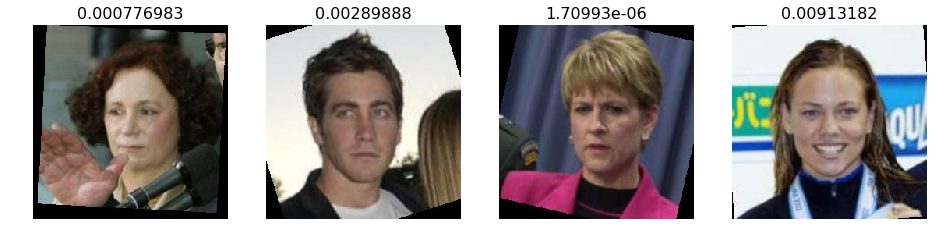

In [20]:
# 1. A few correct labels at random
plot_val_with_title(rand_by_correct(True), "Correctly classified")

Incorrectly classified


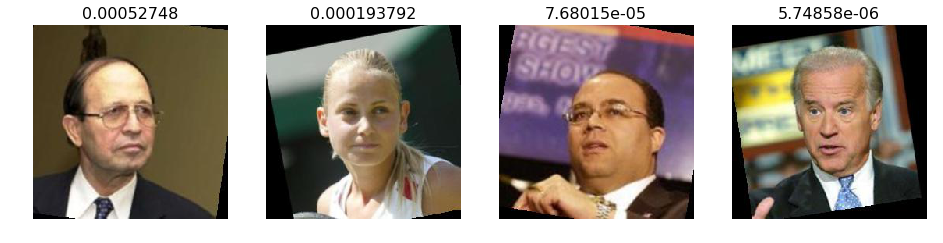

In [21]:
# 2. A few incorrect labels at random
plot_val_with_title(rand_by_correct(False), "Incorrectly classified")

In [22]:
def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask((preds == data.val_y)==is_correct & (data.val_y == y), mult)

Most correct Alejandro_Toledo


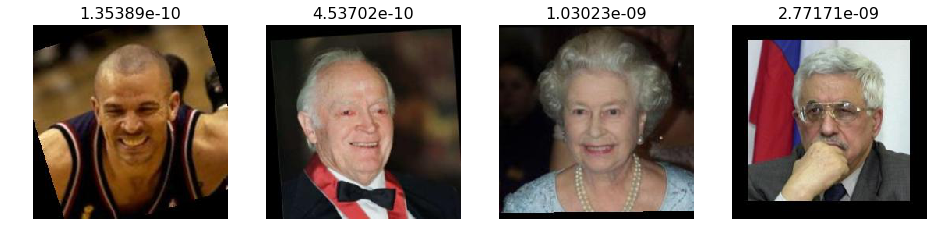

In [23]:
#Mistake! Correct this 
plot_val_with_title(most_by_correct(0, True), "Most correct Alejandro_Toledo") # 0 ->  Alejandro_Toledo

Most correct Alejandro_Toledo


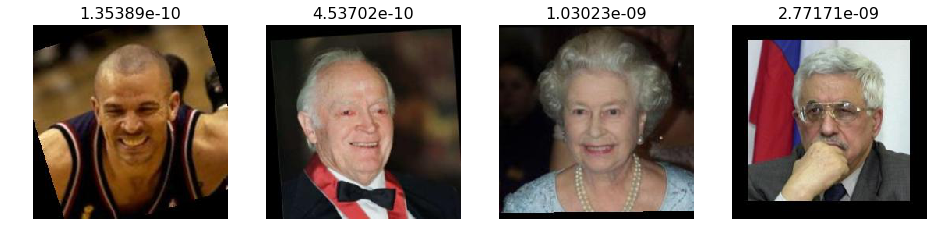

In [24]:
plot_val_with_title(most_by_correct(15, True), "Most correct Alejandro_Toledo") # 0 ->  Alejandro_Toledo

In [25]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [26]:
lrf=learn.lr_find()

A Jupyter Widget

[  0.        6.55576  31.90715   0.00446]                 



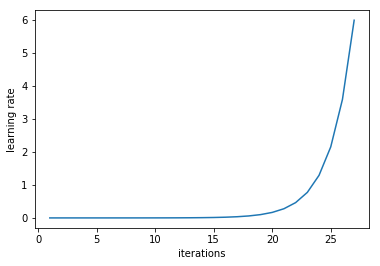

In [27]:
learn.sched.plot_lr()

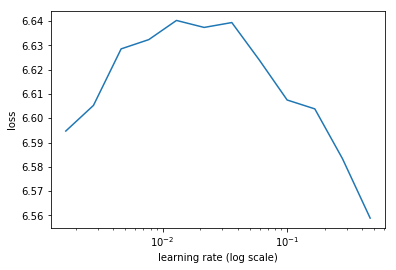

In [28]:
learn.sched.plot()

In [29]:
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

In [30]:
def get_augs():
    data = ImageClassifierData.from_paths(PATH, bs=2, tfms=tfms, num_workers=1)
    x,_ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[1]

In [31]:
ims = np.stack([get_augs() for i in range(6)])

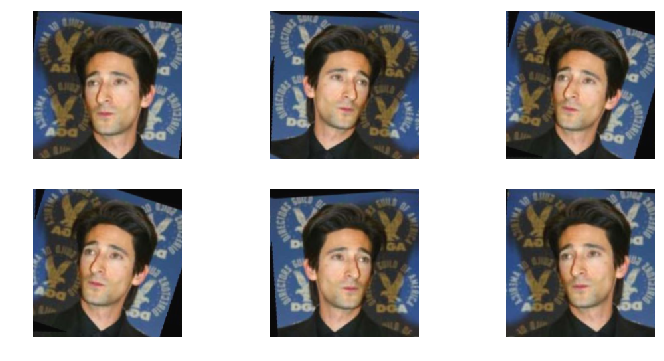

In [32]:
plots(ims, rows=2)

In [33]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms)
learn = ConvLearner.pretrained(arch, data, precompute=True,ps=0.5)

In [34]:
learn.fit(1e-2, 1)

A Jupyter Widget

[ 0.       6.62399  6.08727  0.00446]                     



In [35]:
learn.precompute=False

In [36]:
%time learn.fit(1e-1, 10, cycle_len=1)

A Jupyter Widget

[ 0.       6.30441  5.83874  0.03268]                     
[ 1.       5.76933  5.4618   0.05563]                     
[ 2.       5.26617  5.23011  0.06983]                     
[ 3.       4.81261  4.99246  0.1076 ]                     
[ 4.       4.42655  4.93419  0.09644]                     
[ 5.       4.03011  4.83874  0.12483]                     
[ 6.       3.66632  4.79317  0.12626]                     
[ 7.       3.35028  4.81559  0.13822]                     
[ 8.       3.037    4.78299  0.13215]                     
[ 9.       2.79262  4.79996  0.12929]                     

CPU times: user 4min 4s, sys: 25.1 s, total: 4min 29s
Wall time: 3min


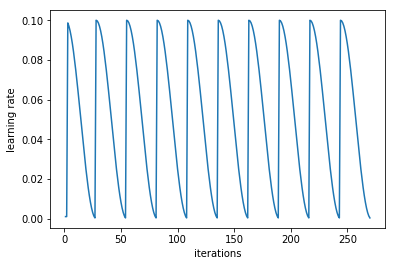

In [37]:
learn.sched.plot_lr()

In [38]:
learn.unfreeze()

In [39]:
#learn.freeze_to(1)
lr=np.array([1e-3,2e-2,3e-1])

In [40]:
%time learn.fit(lr, 7, cycle_len=1, cycle_mult=2)

A Jupyter Widget

[ 0.       4.7904   5.31498  0.07126]                     
[ 1.       4.65749  4.95646  0.08591]                     
[ 2.       3.91255  4.25871  0.14618]                     
[ 3.       3.61432  5.37594  0.1076 ]                     
[ 4.       3.21038  4.15829  0.21663]                     
[ 5.       2.4991   3.67408  0.24931]                     
[ 6.       1.84189  3.59782  0.2686 ]                     
[ 7.       1.73975  5.9662   0.14188]                     
[ 8.       2.01868  5.15961  0.1768 ]                     
[ 9.       1.98679  5.49092  0.17376]                     
[ 10.        1.60141   4.39959   0.26047]                 
[ 11.        1.19937   4.26468   0.2844 ]                 
[ 12.        0.86359   3.98564   0.31467]                  
[ 13.        0.60666   3.89841   0.3378 ]                  
[ 14.        0.45548   3.90082   0.34736]                  
[ 15.        0.45905   5.16065   0.27913]                  
[ 16.        0.69571   6.60918   0.176  ]           

In [41]:
log_preds,y = learn.TTA()
accuracy(log_preds,y)

0.47990543735224589

In [42]:
learn.save(f'{sz}')

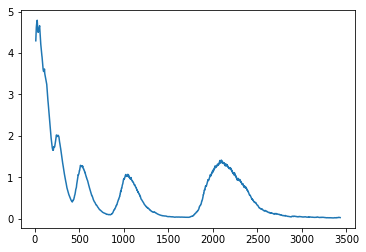

In [43]:
learn.sched.plot_loss()

In [44]:
sz=128

In [45]:
learn.set_data(get_data(sz))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

NameError: name 'get_data' is not defined

In [ ]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
learn.save(f'{sz}')

In [ ]:
sz=256

In [ ]:
learn.set_data(get_data(sz))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

In [ ]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
learn.save(f'{sz}')

In [ ]:
tta = learn.TTA()

In [ ]:
f2(*tta)

### End

## New heading

# New heading